# Determine the Segment of each Customer

Data source: [here](https://drive.google.com/file/d/1yoJHGF4sSp3LM1EKz52WcGAS-R4GYliY/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Import data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dibimbing.id/Day 26 - Customer Segmentation/superstore_dataset.csv', encoding='latin-1')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  subcategory    9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [ ]:
# Convert data types of columns order_date and ship_date
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Calculating sales after discount
df['sales_after_discount'] = df['sales'] - (df['sales'] * df['discount'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id                9994 non-null   int64         
 1   order_id              9994 non-null   object        
 2   order_date            9994 non-null   datetime64[ns]
 3   ship_date             9994 non-null   datetime64[ns]
 4   ship_mode             9994 non-null   object        
 5   customer_id           9994 non-null   object        
 6   customer_name         9994 non-null   object        
 7   segment               9994 non-null   object        
 8   country               9994 non-null   object        
 9   city                  9994 non-null   object        
 10  state                 9994 non-null   object        
 11  postal_code           9994 non-null   int64         
 12  region                9994 non-null   object        
 13  product_id        

In [ ]:
# Creating rfm_table
rfm_table = df.groupby(['customer_id', 'customer_name'], as_index = False).agg({'order_date': ['max'],
                                                      'order_id': ['nunique'],
                                                      'sales_after_discount': ['sum']}).reset_index()
rfm_table.columns = [''.join(col).strip() for col in rfm_table.columns.values]
rfm_table = rfm_table.rename(columns={'order_datemax': 'last_transaction',
                                      'order_idnunique': 'frequency',
                                      'sales_after_discountsum': 'monetary'}).drop(columns='index')
rfm_table.head()

,customer_id,customer_name,last_transaction,frequency,monetary
0,AA-10315,Alex Avila,2017-06-29,5,4547.63200
1,AA-10375,Allen Armold,2017-12-11,9,1021.84600
2,AA-10480,Andrew Allen,2017-04-15,4,1787.40160
3,AA-10645,Anna Andreadi,2017-11-05,6,4554.75105
4,AB-10015,Aaron Bergman,2016-11-10,3,873.88880


In [ ]:
# Calculating recency, r_score, f_score, m_score, rfm_score, customer_segment

from datetime import datetime

# Adding recency column
rfm_table['recency'] = (datetime(2017, 12, 31) - rfm_table["last_transaction"]).dt.days

# Adding r_score column
for i in range(len(rfm_table)):
  if rfm_table.iloc[i]['recency'] <= rfm_table['recency'].quantile(0.2): rfm_table.loc[i, 'r_score'] = '5'
  elif rfm_table.iloc[i]['recency'] <= rfm_table['recency'].quantile(0.4): rfm_table.loc[i, 'r_score'] = '4'
  elif rfm_table.iloc[i]['recency'] <= rfm_table['recency'].quantile(0.6): rfm_table.loc[i, 'r_score'] = '3'
  elif rfm_table.iloc[i]['recency'] <= rfm_table['recency'].quantile(0.8): rfm_table.loc[i, 'r_score'] = '2'
  else: rfm_table.loc[i, 'r_score'] = '1'

# Adding f_score column
for i in range(len(rfm_table)):
  if rfm_table.iloc[i]['frequency'] >= rfm_table['frequency'].quantile(0.8): rfm_table.loc[i, 'f_score'] = '5'
  elif rfm_table.iloc[i]['frequency'] >= rfm_table['frequency'].quantile(0.6): rfm_table.loc[i, 'f_score'] = '4'
  elif rfm_table.iloc[i]['frequency'] >= rfm_table['frequency'].quantile(0.4): rfm_table.loc[i, 'f_score'] = '3'
  elif rfm_table.iloc[i]['frequency'] >= rfm_table['frequency'].quantile(0.2): rfm_table.loc[i, 'f_score'] = '2'
  else: rfm_table.loc[i, 'f_score'] = '1'

# Adding m_score column
for i in range(len(rfm_table)):
  if rfm_table.iloc[i]['monetary'] >= rfm_table['monetary'].quantile(0.8): rfm_table.loc[i, 'm_score'] = '5'
  elif rfm_table.iloc[i]['monetary'] >= rfm_table['monetary'].quantile(0.6): rfm_table.loc[i, 'm_score'] = '4'
  elif rfm_table.iloc[i]['monetary'] >= rfm_table['monetary'].quantile(0.4): rfm_table.loc[i, 'm_score'] = '3'
  elif rfm_table.iloc[i]['monetary'] >= rfm_table['monetary'].quantile(0.2): rfm_table.loc[i, 'm_score'] = '2'
  else: rfm_table.loc[i, 'm_score'] = '1'

# Adding rfm_score column
rfm_table['rfm_score'] = rfm_table['r_score'] + rfm_table['f_score'] + rfm_table['m_score']

# Adding customer_segment column
for i in range(len(rfm_table)):
  rfm_score_int = int(rfm_table.iloc[i]['rfm_score'])
  if (rfm_score_int >= 511) & (rfm_score_int <= 555): rfm_table.loc[i, 'customer_segment'] = 'Champions'
  elif (rfm_score_int >= 451) & (rfm_score_int <= 455): rfm_table.loc[i, 'customer_segment'] = 'Loyal'
  elif (rfm_score_int >= 351) & (rfm_score_int <= 445): rfm_table.loc[i, 'customer_segment'] = 'Potential'
  elif (rfm_score_int >= 211) & (rfm_score_int <= 345): rfm_table.loc[i, 'customer_segment'] = 'At Risk'
  else: rfm_table.loc[i, 'customer_segment'] = 'Need Attention'

rfm_table.head(10)

,customer_id,customer_name,last_transaction,frequency,monetary,recency,r_score,f_score,m_score,rfm_score,customer_segment
0,AA-10315,Alex Avila,2017-06-29,5,4547.63200,185,2,3,5,235,At Risk
1,AA-10375,Allen Armold,2017-12-11,9,1021.84600,20,5,5,2,552,Champions
2,AA-10480,Andrew Allen,2017-04-15,4,1787.40160,260,1,2,3,123,Need Attention
3,AA-10645,Anna Andreadi,2017-11-05,6,4554.75105,56,3,3,5,335,At Risk
4,AB-10015,Aaron Bergman,2016-11-10,3,873.88880,416,1,1,2,112,Need Attention
5,AB-10060,Adam Bellavance,2017-11-06,8,6789.91600,55,3,4,5,345,At Risk
6,AB-10105,Adrian Barton,2017-11-19,10,13741.45530,42,4,5,5,455,Loyal
7,AB-10150,Aimee Bixby,2017-11-19,5,919.53720,42,4,3,2,432,Potential
8,AB-10165,Alan Barnes,2017-12-05,8,1011.14680,26,5,4,2,542,Champions
9,AB-10255,Alejandro Ballentine,2017-07-17,9,798.48960,167,2,5,2,252,At Risk


# Quick Insight

In [ ]:
df_full = pd.merge(df, rfm_table[['customer_id', 'rfm_score', 'customer_segment']], on='customer_id', how='left')

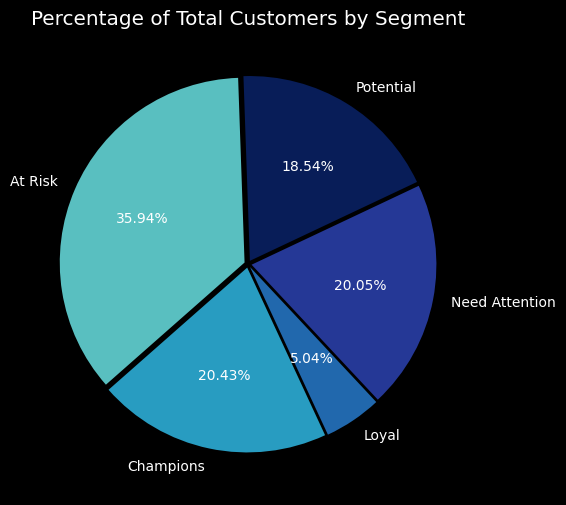

In [ ]:
from ctypes import alignment
# Total customer per segment

import matplotlib.cm as cm

table_1 = df_full.groupby('customer_segment')['customer_id'].nunique().rename('total_customer').reset_index()
fig, axes = plt.subplots(figsize=(6, 6))
plt.style.use('dark_background')
colors = cm.YlGnBu(np.linspace(0.45, 1, len(table_1)))
plt.pie(table_1['total_customer'], labels=table_1['customer_segment'], autopct='%.2f%%', colors=colors, startangle=92, explode=[0.02, 0.02, 0.02, 0.02, 0.02])
plt.title("Percentage of Total Customers by Segment")
plt.show()

<ipython-input-179-9795d91587b4>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom_values[i] + value / 2,  # Center of the bar segment


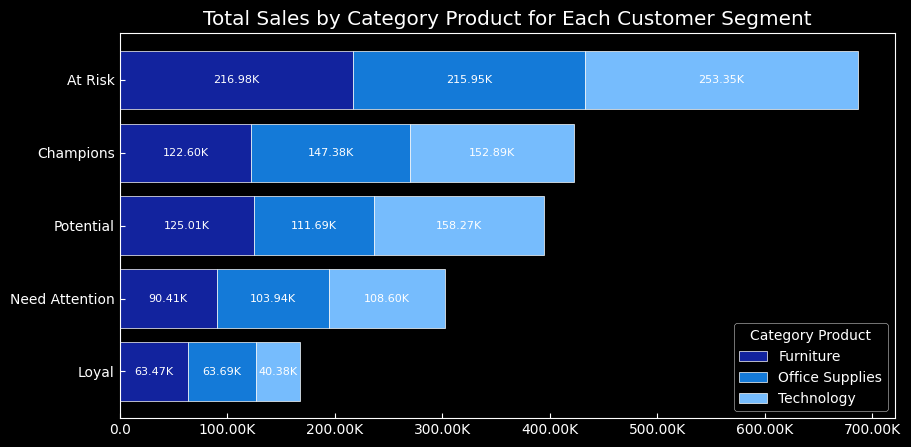

In [ ]:
import matplotlib.ticker as ticker

table_2 = df_full.groupby(['customer_segment', 'category'])['sales_after_discount'].sum().reset_index(name='total_sales').sort_values(by='total_sales', ascending=False)
stacked_data = pd.pivot_table(table_2,
                             index='customer_segment',
                             columns='category',
                             values='total_sales',
                             margins=True,
                             aggfunc='sum')
stacked_data = stacked_data.drop(index='All').sort_values(by='All').drop(columns='All')

fig, ax = plt.subplots(figsize=(10, 5))

# Define positions for bars
bar_positions = np.arange(len(stacked_data.index))

# Stacked bar plot
bottom_values = np.zeros(len(stacked_data.index))  # Track the bottom position for stacking
colors = {'Furniture': '#12239E', 'Office Supplies': '#147AD8', 'Technology': '#76BCFD'}

# Function to change numbers into K symbols
def thousands_formatter(x, pos):
    if x >= 1000:
        return f'{x/1000:.2f}K'
    return f'{x}'

for label in stacked_data.columns:
    ax.barh(
        bar_positions,
        stacked_data[label],
        color=colors[label],
        edgecolor='white',
        label=label,
        left=bottom_values,
    )
    for i, value in enumerate(stacked_data[label]):
        if value > 0:  # Only add labels for non-zero values
            display_text = f'{thousands_formatter(value, 0)}'  # Format the text to display
            ax.text(
                bottom_values[i] + value / 2,  # Center of the bar segment
                i,  # y-position (bar index)
                display_text,
                ha='center',
                va='center',
                fontsize=8,
                color='white',
            )
    bottom_values += stacked_data[label]   # Update bottom_values for next stack

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
ax.set_yticks(bar_positions)
ax.set_yticklabels(stacked_data.index)
ax.set_title('Total Sales by Category Product for Each Customer Segment')
ax.legend(title='Category Product')
ax.grid(False)

plt.show()

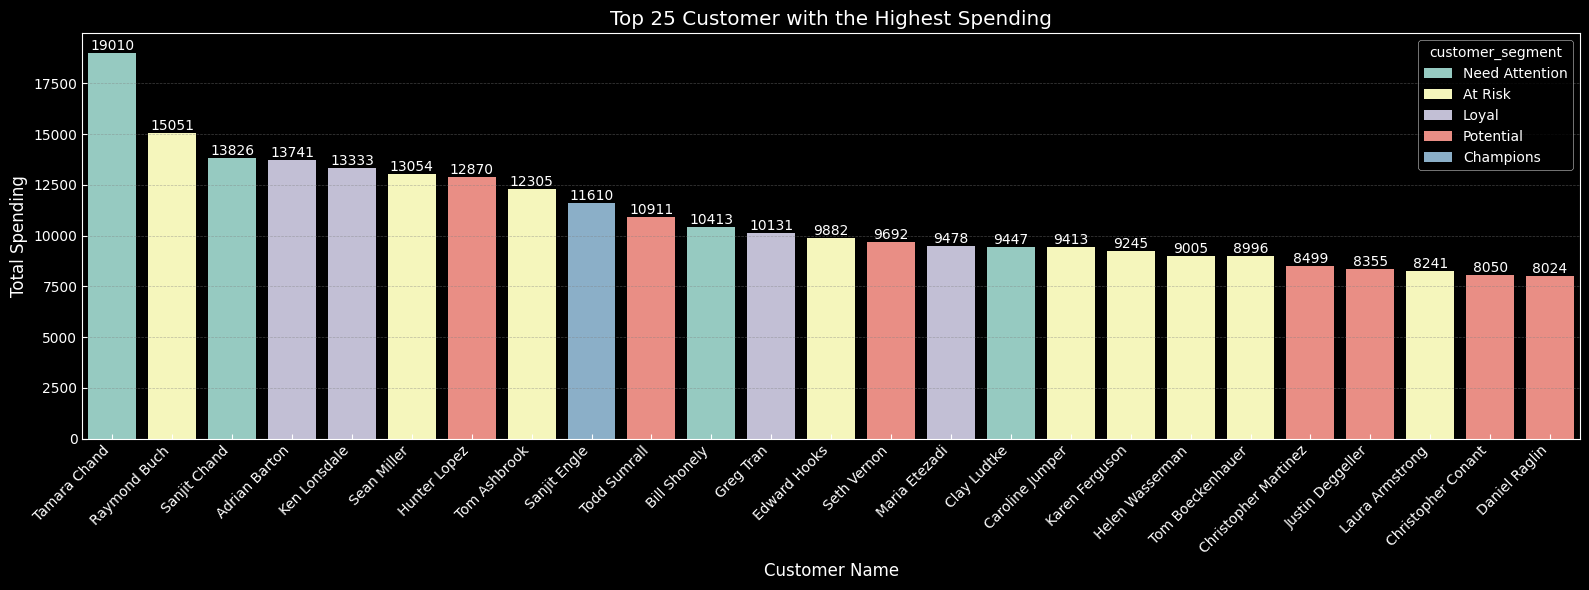

In [ ]:
multiple_bar = df_full.groupby(['customer_name', 'customer_segment'])['sales_after_discount'].sum().reset_index().sort_values(by='sales_after_discount', ascending=False)
fig, axes = plt.subplots(figsize=(16,6))
plt.style.use('dark_background')
ax = sns.barplot(multiple_bar.head(25), x='customer_name', y='sales_after_discount', hue='customer_segment')
plt.title('Top 25 Customer with the Highest Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', color='grey', linestyle='--', alpha=0.5)
for i in axes.containers:
    axes.bar_label(i, fmt='%.0f')

plt.tight_layout()
plt.show()

In [ ]:
# Detailing about top 25 customer with the highest spending/monetary
rfm_table[rfm_table['customer_name'].isin(multiple_bar.head(25)['customer_name'])][['customer_name', 'customer_segment', 'rfm_score', 'recency', 'frequency', 'monetary']].sort_values(by='monetary', ascending=False)

,customer_name,customer_segment,rfm_score,recency,frequency,monetary
741,Tamara Chand,Need Attention,135,400,5,19010.158800
621,Raymond Buch,At Risk,335,97,6,15051.414700
669,Sanjit Chand,Need Attention,155,350,9,13825.665200
6,Adrian Barton,Loyal,455,42,10,13741.455300
434,Ken Lonsdale,Loyal,455,48,12,13332.644100
700,Sean Miller,At Risk,335,80,5,13053.994000
327,Hunter Lopez,Potential,435,44,6,12870.168400
730,Tom Ashbrook,At Risk,325,70,4,12305.063200
683,Sanjit Engle,Champions,555,10,11,11609.615000
764,Todd Sumrall,Potential,435,37,6,10910.969000


Further visualizations and insights can be seen in the dashboard and insight documents.